In [31]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import comb

In [32]:
#w_theta = np.ones((6, 6))*2.0
filename_wtheta = 'w_theta_max_6'
w_theta = np.loadtxt(fname=filename_wtheta, skiprows=2)
y_num = w_theta.shape[0]
x_num = w_theta.shape[1]

In [33]:
x_start = -500.0
x_end = 500.0
y_start = -500.0
y_end = 500.0

jump_x = (x_end - x_start) / (2.0 * x_num)
jump_y = (y_end - y_start) / (2.0 * y_num)

x_positions = np.linspace(start=x_start, stop=x_end, num=x_num, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=y_num, endpoint=False)

xy_pos = []
for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        y_index_ = y_num - y_index - 1
        text_x = x + jump_x
        text_y = y + jump_y
        if (w_theta[y_index_, x_index] == 2.5):
            xy_pos.append(np.array([text_x, text_y]))

r_mean = 0.0
N = 0
for i in range(len(xy_pos)):
    xy_1 = xy_pos[i]
    for j in range(i+1, len(xy_pos)):
        xy_2 = xy_pos[j]
        #print('')
        #print(xy_1)
        #print(xy_2)

        r = np.linalg.norm(xy_1 - xy_2)
        #print(r)
        r_mean = r_mean + r
        N = N + 1
        
r_mean = r_mean / comb(len(xy_pos), 2)
#print(r_mean / comb(len(xy_pos), 2))
#print(r_mean / N)
print(r_mean)

819.2915529863986


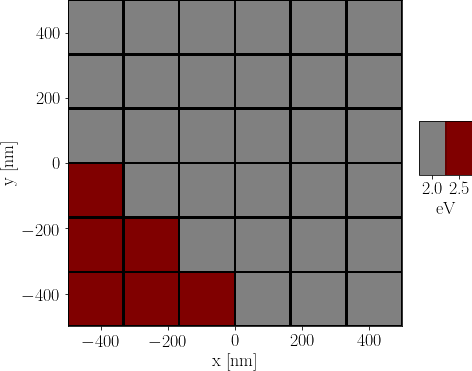

In [3]:
Z = w_theta
x = np.linspace(-500, 500, 7)
y = x

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=18)
plt.rcParams['figure.figsize'] = [10, 7.5]
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
#plt.rcParams["figure.edgecolor"] = 'r'

cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)

# create the new map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(1.75, 2.75, 3)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))  # setup the plot

ax.pcolormesh(x, y, Z, edgecolors='k', linewidths=1.5, cmap=cmap, norm=norm)

plt.xlabel('x [nm]')
plt.ylabel('y [nm]')

# create a second axes for the colorbar
ax2 = fig.add_axes([0.925, 0.475, 0.15, 0.125])
cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm,
    spacing='uniform', ticks=[2.0, 2.5], boundaries=None, format='%.1f', drawedges=True, orientation='horizontal')
cb.set_label('eV')

#plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
#plt.rcParams['savefig.pad_inches'] = 0.0
#plt.savefig('checkerboard_pattern.pdf', bbox_inches='tight')

plt.show()